Reading data from csv, creating dataframe, and show first five rows

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('framingham.csv')
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Calculating missing data

In [2]:
df.isnull().sum()


sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [3]:
df.fillna(df.median(), inplace=True)

Filling missing data with mean

In [4]:
# df.education=df.education.fillna(df.education.mean())
# df.cigsPerDay =df.cigsPerDay.fillna(df.cigsPerDay.mean())
# df.BPMeds =df.BPMeds.fillna(df.BPMeds.mean())
# df.totChol =df.totChol.fillna(df.totChol.mean())
# df.BMI =df.BMI.fillna(df.BMI.mean())
# df.heartRate =df.heartRate.fillna(df.heartRate.mean())
# df.glucose  =df.glucose.fillna(df.heartRate.mean())
# df.isnull().sum()

Scaling the data for better convergence

In [5]:
# cols_to_scale=['age','education','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()

# df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

Creating the logistic regression model

In [4]:
X=df.drop('TenYearCHD',axis='columns')
y=df.TenYearCHD

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)

x:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred = model.predict(X_test)


In [23]:
print('                Predicted Negative    Predicted Positive')
print('Actual Negative           TN                    FP')
print('Actual Positive           FN                    TP')

                Predicted Negative    Predicted Positive
Actual Negative           TN                    FP
Actual Positive           FN                    TP


Confusion Matrix:
[[718   6]
 [115   9]]


                Predicted Negative    Predicted Positive
Actual Negative           TN                    FP
Actual Positive           FN                    TP


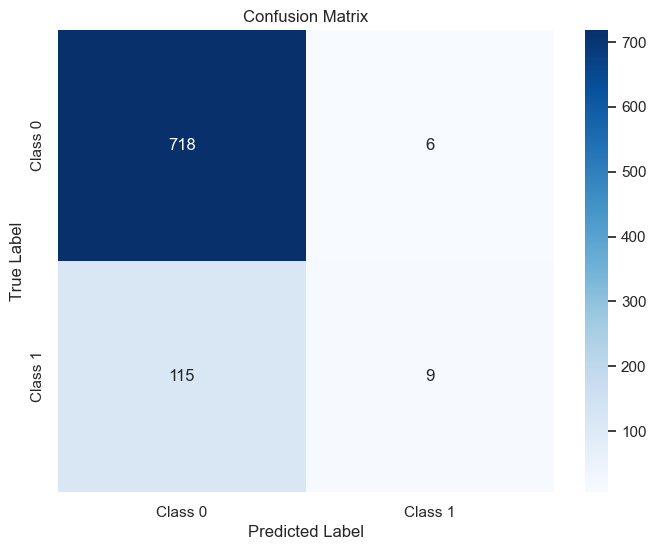

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print('\n')
print('                Predicted Negative    Predicted Positive')
print('Actual Negative           TN                    FP')
print('Actual Positive           FN                    TP')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


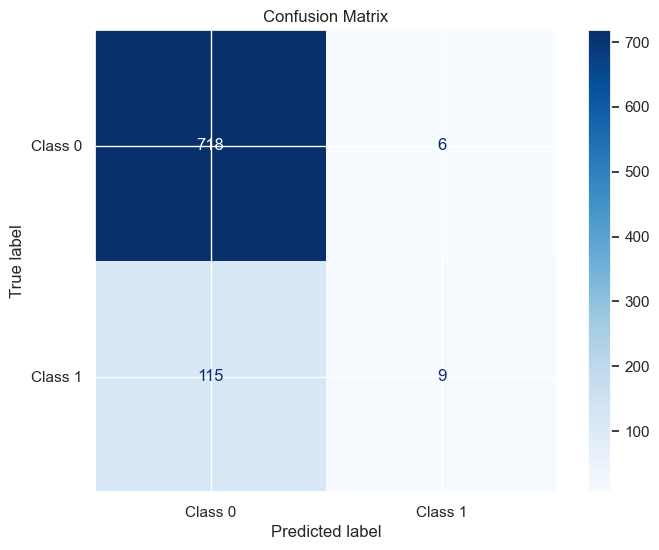

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you already have the confusion matrix 'cm'
# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap='Blues', ax=ax)  # You can specify other parameters like cmap (color map)
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8573113207547169
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



Evaluating the model, with accuracy

In [11]:
model.score(X_train,y_train)


0.8536873156342183

In [12]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8573113207547169
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



Showing the actual accuracy for both classes

In [13]:
from sklearn.metrics import accuracy_score
train_predictions = model.predict(X_train)

train_accuracy = accuracy_score(y_train, train_predictions)

accuracy_class_0 = accuracy_score(y_train[y_train == 0], train_predictions[y_train == 0])

accuracy_class_1 = accuracy_score(y_train[y_train == 1], train_predictions[y_train == 1])

print("Training Accuracy (Overall):", train_accuracy)
print("Training Accuracy for Class 0:", accuracy_class_0)
print("Training Accuracy for Class 1:", accuracy_class_1)

Training Accuracy (Overall): 0.8536873156342183
Training Accuracy for Class 0: 0.9958188153310105
Training Accuracy for Class 1: 0.06923076923076923


F'-score and Recall on the other hand can tell us the poor performance of the predictions

In [14]:
from sklearn.metrics import recall_score, f1_score
train_predictions = model.predict(X_train)

# Calculate recall for class 1
recall_class_1 = recall_score(y_train, train_predictions)

# Calculate F1 score for class 1
f1_score_class_1 = f1_score(y_train, train_predictions)

# Print out the recall and F1 score for class 1
print("Recall for Class 1:", recall_class_1)
print("F1 Score for Class 1:", f1_score_class_1)

Recall for Class 1: 0.06923076923076923
F1 Score for Class 1: 0.1267605633802817


It can be seen, that the overall accuracy seems good, but the actual result is poor performance in class 1 because the data is skewed.
We can easily observe this with in the following:

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


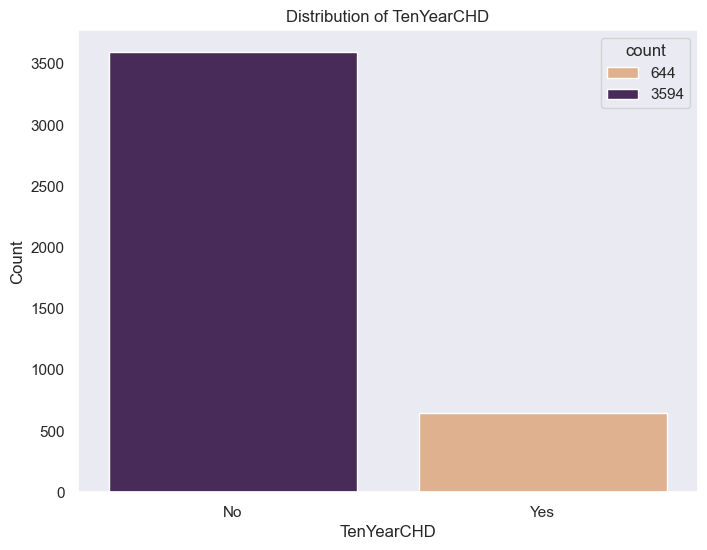

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the counts of each class
x = df['TenYearCHD'].value_counts()

# colors = sns.color_palette("Set2")
colors = sns.color_palette("flare", as_cmap=True)



plt.figure(figsize=(8, 6))
sns.barplot(x=x.index, y=x.values, hue=x, palette=colors)
plt.title('Distribution of TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Labeling x-axis with 'No' and 'Yes' instead of 0 and 1
plt.grid(axis='y')  # Add grid lines to the y-axis
plt.show()

We can now see, that the amount of Class 0 is five times more, than Class 1.



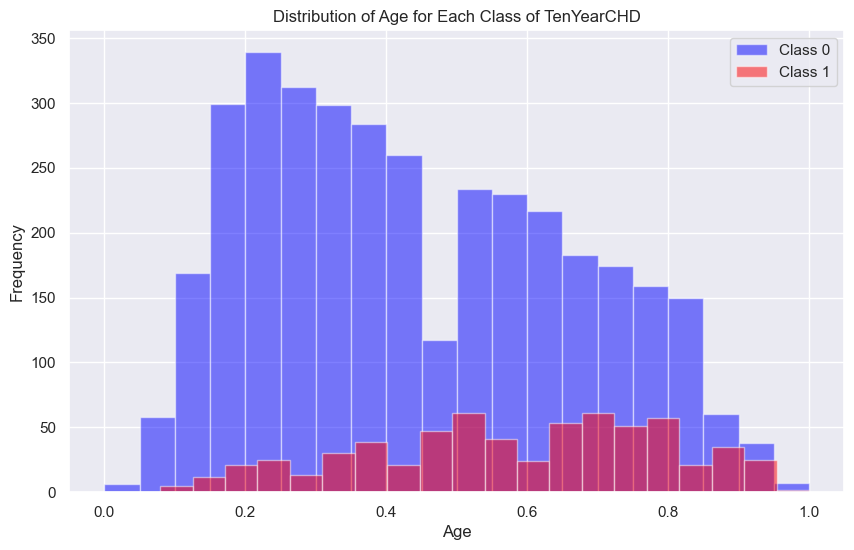

In [17]:
chd_0 = df[df['TenYearCHD'] == 0]
chd_1 = df[df['TenYearCHD'] == 1]

# Plotting the distribution of each subset
plt.figure(figsize=(10, 6))

# Plot for CHD = 0
plt.hist(chd_0['age'], bins=20, alpha=0.5, color='blue', label='Class 0')

# Plot for CHD = 1
plt.hist(chd_1['age'], bins=20, alpha=0.5, color='red', label='Class 1')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Each Class of TenYearCHD')
plt.legend()
plt.grid(True)
plt.show()

A plot to see, how the target column is distributed by age.